# Zadanie 2

In [74]:
library(ggplot2)
library(glue)
library(dplyr)
library(readr)
library(ggthemes)
library(tidyr)

Warning message:
"pakiet 'tidyr' został zbudowany w wersji R 4.2.2"


In [75]:
inflation_data <- read.csv("data/EU_Inflation_HICP_data_mod.csv", header = TRUE, sep = ",")
deposits_data <- read.csv("data/EU_deposits_1yr_data_mod.csv", header = TRUE, sep = ",")

In [76]:
head(inflation_data)

,Period,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,EU..changing.composition.,Germany,Denmark,Estonia,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/10/2022,11.5,13.1,NA,8.6,NA,NA,11.6,NA,22.4,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2,01/09/2022,10.9,12.1,15.6,9.0,17.8,10.9,10.9,11.1,24.1,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
3,01/08/2022,9.3,10.5,15.0,9.6,17.1,10.1,8.8,9.9,25.2,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4
4,01/07/2022,9.4,10.4,14.9,10.6,17.3,9.8,8.5,9.6,23.2,⋯,9.3,21.3,6.8,11.6,14.2,9.4,13.0,8.3,11.7,12.8
5,01/06/2022,8.7,10.5,14.8,9.0,16.6,9.6,8.2,9.1,22.0,⋯,10.3,19.2,6.1,9.9,14.2,9.0,13.0,8.9,10.8,12.6
6,01/05/2022,7.7,9.9,13.4,8.8,15.2,8.8,8.7,8.2,20.1,⋯,9.1,16.8,5.8,10.2,12.8,8.1,12.4,7.5,8.7,11.8


In [77]:
head(deposits_data)

,Period,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,01/09/2022,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2,01/08/2022,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
3,01/07/2022,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
4,01/06/2022,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
5,01/05/2022,0.08,0.07,0.04,0.05,4.53,0.14,-0.5,NA,0.50,⋯,,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
6,01/04/2022,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [78]:
inflation_data$Period <- as.Date(inflation_data$Period, format = "%d/%m/%Y")
deposits_data$Period <- as.Date(deposits_data$Period, format = "%d/%m/%Y")

In [79]:
deposits_data[, 2:34] <- sapply(deposits_data[, 2:34], as.numeric)
# str(deposits_data)

Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in lapply(X = X, FUN = FUN, ...):
"pojawiły się wartości NA na skutek przekształcenia"


In [80]:
eurozone_countries_inflation <- select(inflation_data, matches("Period|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
other_countries_inflation <- select(inflation_data, !matches("EU|Austria|Belgium|Cyprus|Germany|Estonia|Spain|Finland|France|Greece|Ireland|Italy|Lithuania|Luxembourg|Latvia|Malta|Netherlands|Portugal|Slovenia|Slovakia"))
# EU_countries_inflation <- select(inflation_data, matches("Period|EU"))
# Poland_inflation <- select(inflation_data, matches("Period|Poland"))

In [81]:
head(eurozone_countries_inflation)

,Period,Austria,Belgium,Cyprus,Germany,Estonia,Spain,Finland,France,Greece,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlands,Portugal,Slovenia,Slovakia
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2022-10-01,11.5,13.1,8.6,11.6,22.4,7.3,8.3,7.1,9.8,9.6,12.8,22.0,8.8,21.8,7.5,16.8,10.6,10.3,14.5
2,2022-09-01,10.9,12.1,9.0,10.9,24.1,9.0,8.4,6.2,12.1,8.6,9.4,22.5,8.8,22.0,7.4,17.1,9.8,10.6,13.6
3,2022-08-01,9.3,10.5,9.6,8.8,25.2,10.5,7.9,6.6,11.2,9.0,9.1,21.1,8.6,21.4,7.0,13.7,9.3,11.5,13.4
4,2022-07-01,9.4,10.4,10.6,8.5,23.2,10.7,8.0,6.8,11.3,9.6,8.4,20.9,9.3,21.3,6.8,11.6,9.4,11.7,12.8
5,2022-06-01,8.7,10.5,9.0,8.2,22.0,10.0,8.1,6.5,11.6,9.6,8.5,20.5,10.3,19.2,6.1,9.9,9.0,10.8,12.6
6,2022-05-01,7.7,9.9,8.8,8.7,20.1,8.5,7.1,5.8,10.5,8.3,7.3,18.5,9.1,16.8,5.8,10.2,8.1,8.7,11.8


In [82]:
eurozone_countries_inflation_avg <- data.frame(eurozone_countries_inflation[1], (rowMeans(eurozone_countries_inflation[2:20], na.rm=TRUE)))
other_countries_inflation_avg <- data.frame(other_countries_inflation[1], (rowMeans(other_countries_inflation[2:9], na.rm=TRUE)))
EU_countries_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("EU")))
Poland_inflation <- data.frame(eurozone_countries_inflation[1], select(inflation_data, matches("Poland")))

In [83]:
inflation_avg <- data.frame(eurozone_countries_inflation[1], eurozone_countries_inflation_avg[2], other_countries_inflation_avg[2], EU_countries_inflation[2], Poland_inflation[2])

colnames(inflation_avg)[1] <- "Period"
colnames(inflation_avg)[2] <- "Eurozone"
colnames(inflation_avg)[3] <- "Other"
colnames(inflation_avg)[4] <- "EU"
colnames(inflation_avg)[5] <- "Poland"

Warning message:
"Removed 96 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 97 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 49 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 109 rows containing missing values (`geom_line()`)."


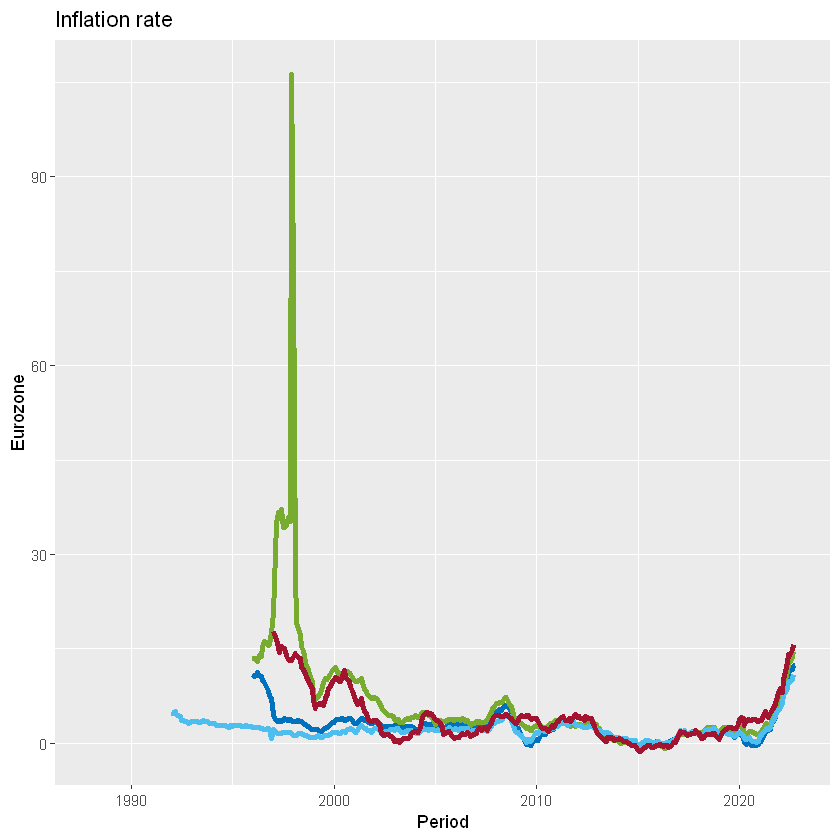

In [84]:
ggplot(data = inflation_avg, aes(x=Period)) +
  geom_line( aes(y=Eurozone), color="#0072BD", size=1.5)+
  geom_line( aes(y=Other), color="#77AC30", size=1.5)+
  geom_line( aes(y=EU), color="#4DBEEE", size=1.5)+
  geom_line( aes(y=Poland), color="#A2142F", size=1.5)+
  labs(title = "Inflation rate")

In [85]:
# January 2018 - October 2022
n_months = 58

In [86]:
copy_inf = subset(inflation_data, select=c(Period))[c(2:n_months),]

In [87]:
inflation_from2018 = subset(inflation_data, select=-c(EU..changing.composition.))[c(2:n_months),]
inflation_from2018['average'] = rowMeans(inflation_from2018[2:28], na.rm=TRUE)

In [88]:
deposits_from2018 = subset(deposits_data, select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas))[c(1:(n_months-1)),]
deposits_from2018['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [89]:
inf_cols = colnames(subset(inflation_data, select=-c(Period, EU..changing.composition.)))

In [90]:
dep_cols = colnames(subset(deposits_data[2:34], select=-c(Slovakia..Slovak.koruna, Slovenia..Slovenian.tolar, Malta..Maltese.lira, Estonia..Estonian.kroon, Latvia..Latvian.lats, Lithuania..Lithuanian.litas)))

In [91]:
inf_cols

[1] "Austria"        "Belgium"        "Bulgaria"       "Cyprus"        
 [5] "Czech.Republic" "Germany"        "Denmark"        "Estonia"       
 [9] "Spain"          "Finland"        "France"         "Greece"        
[13] "Croatia"        "Hungary"        "Ireland"        "Italy"         
[17] "Lithuania"      "Luxembourg"     "Latvia"         "Malta"         
[21] "Netherlands"    "Poland"         "Portugal"       "Romania"       
[25] "Sweden"         "Slovenia"       "Slovakia"

In [92]:
dep_cols

[1] "Austria..Euro"                "Belgium..Euro"               
 [3] "Bulgaria..Bulgarian.lev"      "Cyprus..Euro"                
 [5] "Czech.Republic..Czech.koruna" "Germany..Euro"               
 [7] "Denmark..Danish.krone"        "Estonia..Euro"               
 [9] "Spain..Euro"                  "Finland..Euro"               
[11] "France..Euro"                 "Greece..Euro"                
[13] "Croatia..Croatian.kuna"       "Hungary..Hungarian.forint"   
[15] "Ireland..Euro"                "Italy..Euro"                 
[17] "Lithuania..Euro"              "Luxembourg..Euro"            
[19] "Latvia..Euro"                 "Malta..Euro"                 
[21] "Netherlands..Euro"            "Poland..Polish.zloty"        
[23] "Portugal..Euro"               "Romania..Romanian.leu"       
[25] "Sweden..Swedish.krona"        "Slovenia..Euro"              
[27] "Slovakia..Euro"

In [93]:
deposits_to_inflation <- data.frame(copy_inf)
for (i in 1:length(dep_cols)){
    col_inf <- inf_cols[i]
    col_dep <- dep_cols[i]
    new_column = deposits_from2018[col_dep] / inflation_from2018[col_inf]
    deposits_to_inflation[col_inf] = new_column
}
names(deposits_to_inflation)[names(deposits_to_inflation) == "copy_inf"] <- "Period"
# deposits_to_inflation[Period] = periods_from2018
deposits_to_inflation['average'] = rowMeans(deposits_from2018[2:28], na.rm=TRUE)

In [94]:
country1 = 'Poland'
country2 = 'France'
country3 = 'Hungary'
country4 = 'Slovakia'

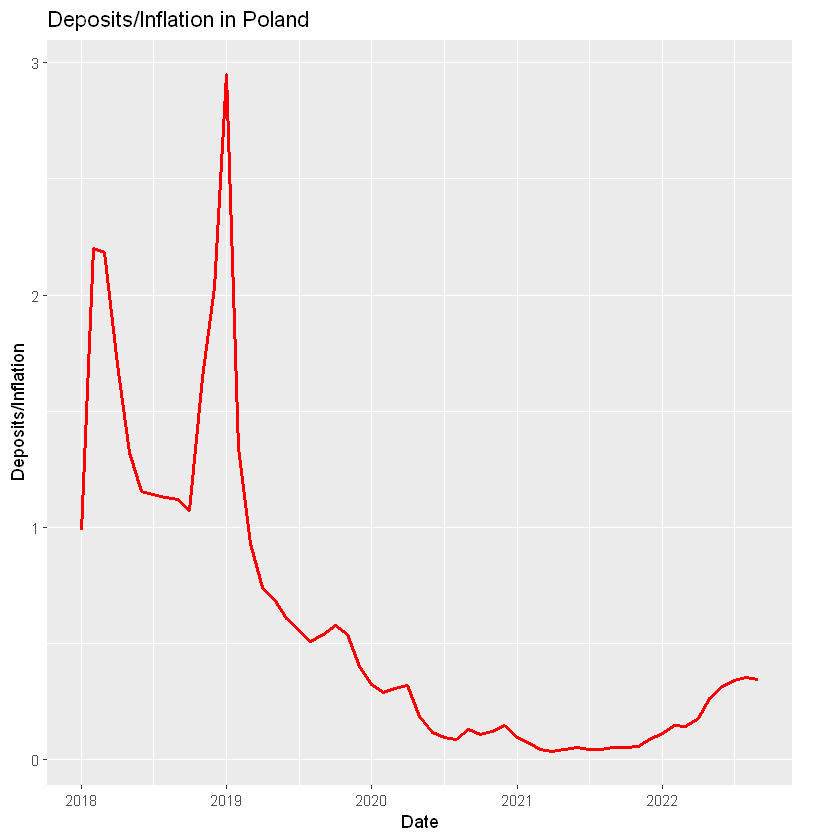

In [95]:
ggplot(data = deposits_to_inflation) +
  geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
  theme(plot.margin = margin(.2,1,0.2,0.2, "cm")) + 
  labs(x = "Date",
       y = "Deposits/Inflation",
       title = "Deposits/Inflation in Poland")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


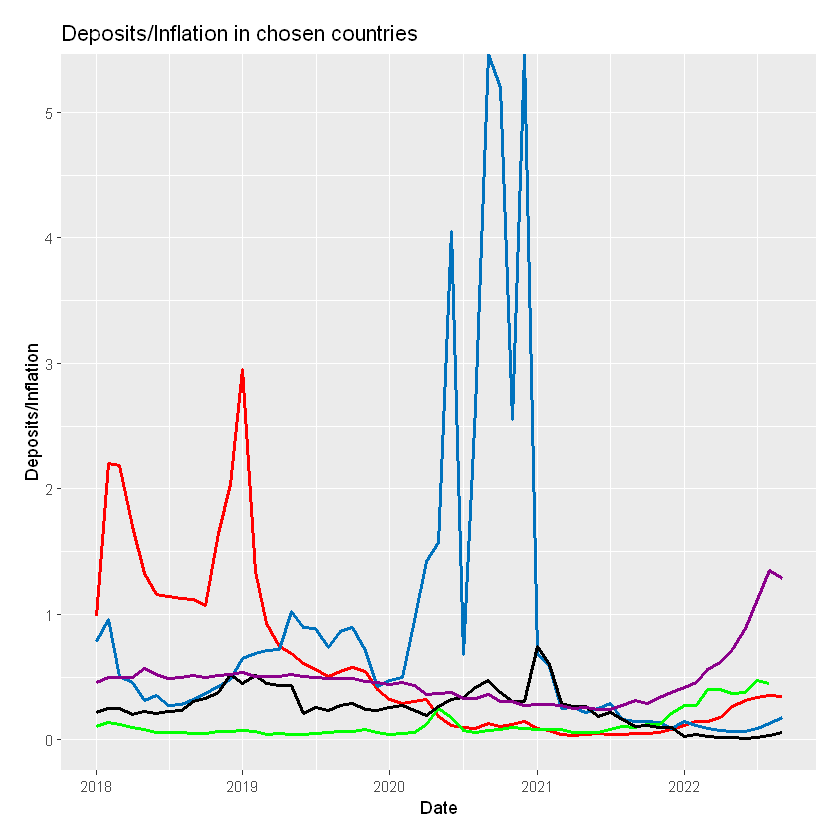

In [96]:
ggplot(data = deposits_to_inflation) +
    geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation",
        title = "Deposits/Inflation in chosen countries")

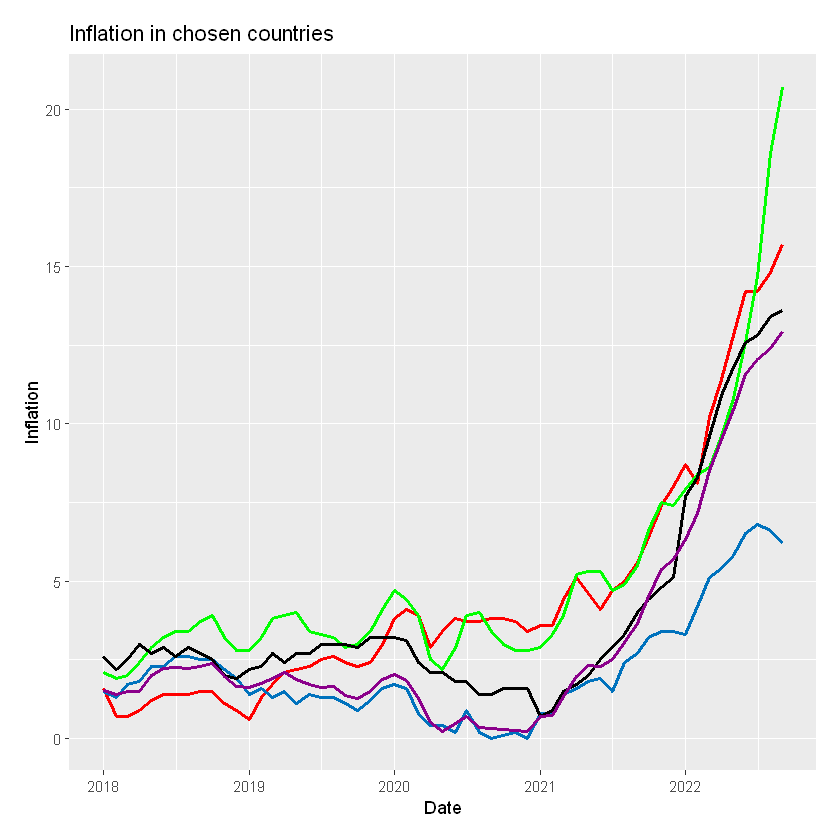

In [97]:
ggplot(data = inflation_from2018) +
    geom_line(aes(x = Period, y = Poland), color="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Inflation", 
        title = "Inflation in chosen countries")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


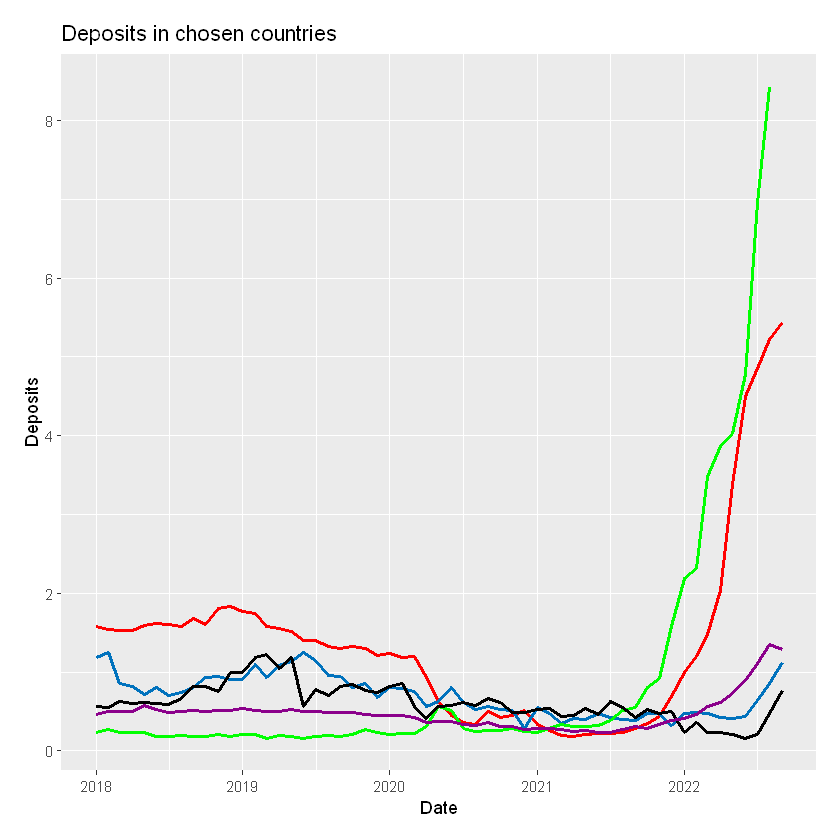

In [104]:
ggplot(data = deposits_from2018) +
    geom_line(aes(x = Period, y = Poland..Polish.zloty), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France..Euro), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary..Hungarian.forint), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia..Euro), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits", 
        title = "Deposits in chosen countries")


In [99]:
# Creating ranges of intervals
before_pandemic <- as.Date("01/01/2018", "%d/%m/%Y")
pandemic <- as.Date("01/03/2020", "%d/%m/%Y")
before_war <- as.Date("01/02/2021", "%d/%m/%Y")
war <- as.Date("01/02/2022", "%d/%m/%Y")
now <- as.Date("01/09/2022", "%d/%m/%Y")

In [100]:
# Split data to intervals
before_pandemic_data <- deposits_to_inflation %>% filter(Period >= before_pandemic & Period < pandemic)
pandemic_data <- deposits_to_inflation %>% filter(Period >= pandemic & Period < before_war)
before_war_data <- deposits_to_inflation %>% filter(Period >= before_war & Period < war)
war_data <- deposits_to_inflation %>% filter(Period >= war & Period <= now)

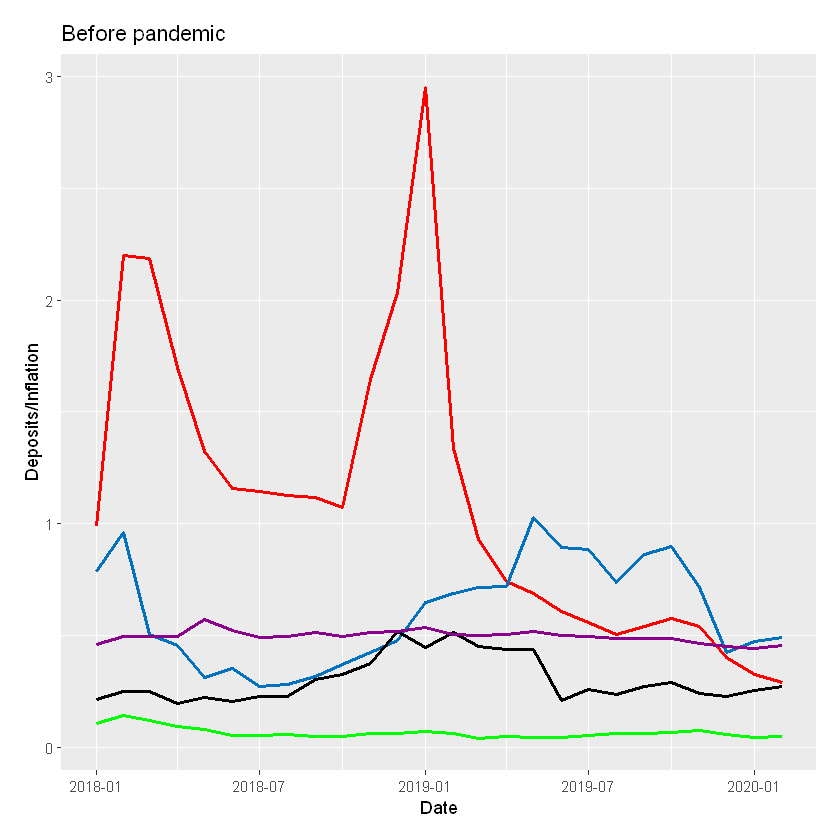

In [113]:
# before pandemic
ggplot(data = before_pandemic_data) +
    geom_line(aes(x = Period, y = Poland), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation", 
        title = "Before pandemic")

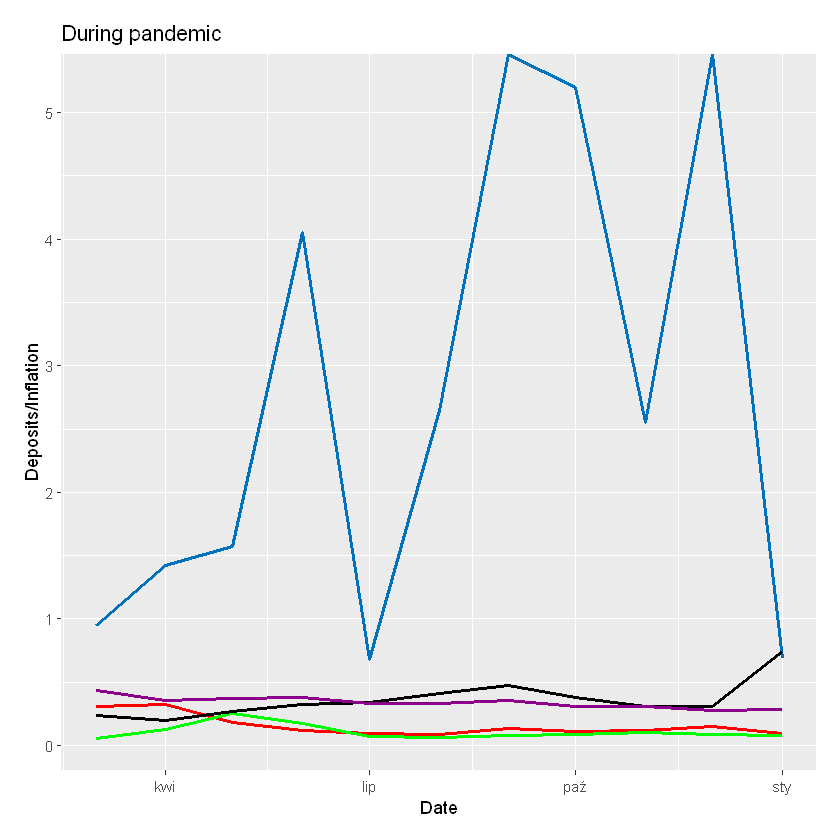

In [114]:
# during pandemic
ggplot(data = pandemic_data) +
    geom_line(aes(x = Period, y = Poland), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation", 
        title = "During pandemic")

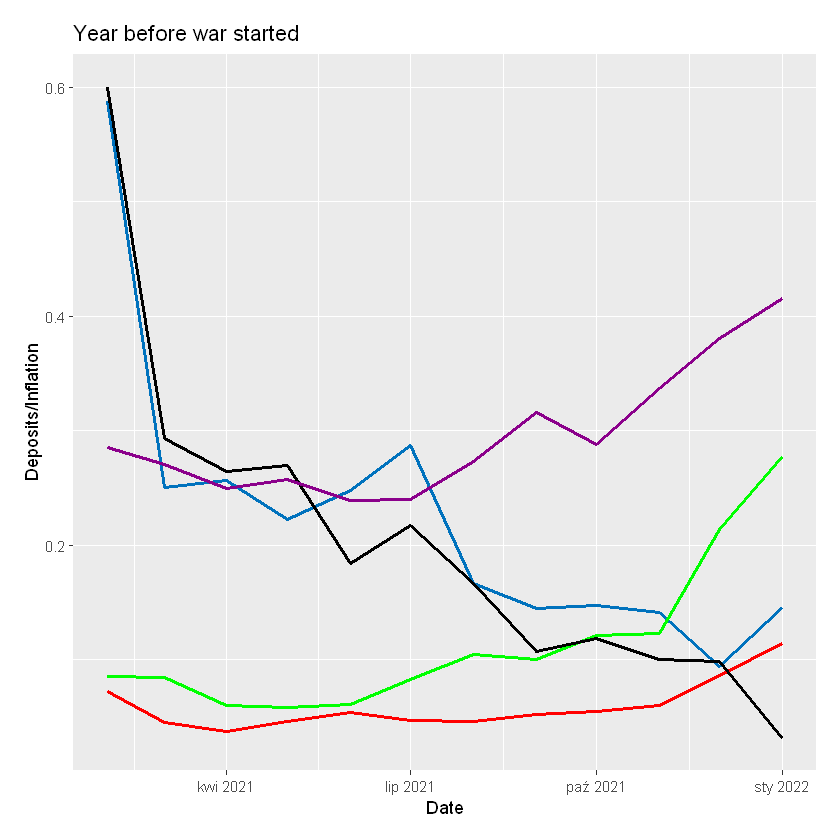

In [115]:
# right before war
ggplot(data = before_war_data) +
    geom_line(aes(x = Period, y = Poland), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation", 
        title = "Year before war started")

Warning message:
"Removed 1 row containing missing values (`geom_line()`)."


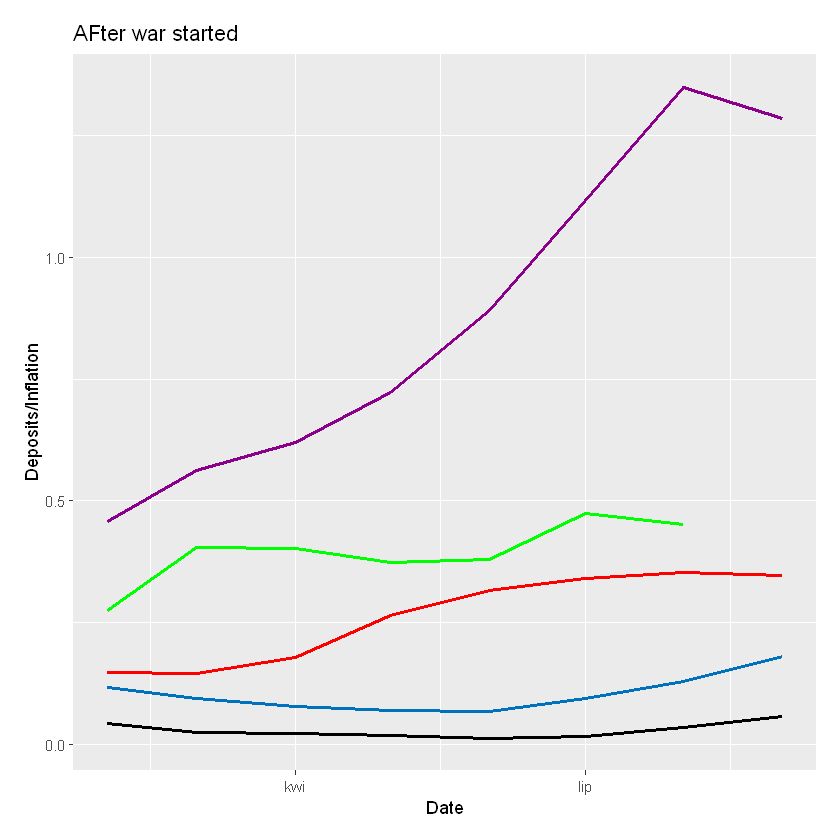

In [116]:
# after war started
ggplot(data = war_data) +
    geom_line(aes(x = Period, y = Poland), colour="#FF0000", size=1) +
    geom_line(aes(x = Period, y = France), color="#0072BD", size=1) +
    geom_line(aes(x = Period, y = Hungary), color="#00FF00", size=1) +
    geom_line(aes(x = Period, y = Slovakia), color="#000000", size=1) +
    geom_line(aes(x = Period, y = average), color="#8B008B", size=1) +
    theme(plot.margin = margin(.5,.5,.5,.5, "cm")) + 
    labs(x = "Date",
        y = "Deposits/Inflation", 
        title = "AFter war started")